<a href="https://colab.research.google.com/github/AlirezaAhadipour/Bank-Marketing/blob/main/Bank_Marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# Dataset

[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

In [ ]:
df = pd.read_csv('bank-full.csv', sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
df.shape

(45211, 17)

In [ ]:
df.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

The dataset is highly imbalanced

In [ ]:
# count the number of NaN values in each column

nan_count = df.isna().sum()
nan_count

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

There is no NaN value in the DataFrame

# Pre-processing

In [ ]:
df['y'].unique()

array(['no', 'yes'], dtype=object)

In [ ]:
# convert labels to 0 and 1

df['y'] = (df['y'] == 'yes').astype(int)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [ ]:
df['y'].unique()

array([0, 1])

In [ ]:
# convert binary values in columns to 0 and 1

df['default'] = (df['default'] == 'yes').astype(int)
df['housing'] = (df['housing'] == 'yes').astype(int)
df['loan'] = (df['loan'] == 'yes').astype(int)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0


In [ ]:
df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [ ]:
# convert month to numerical values

month_dict = {'jan': 1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec':12}
df['month'] = df['month'].map(month_dict)

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,5,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,5,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,5,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,5,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,5,198,1,-1,0,unknown,0


In [ ]:
# convert categorical values to dummy features

one_hot_encoded_marital = pd.get_dummies(df['marital'], prefix='marital')
one_hot_encoded_job = pd.get_dummies(df['job'], prefix='job')
one_hot_encoded_education = pd.get_dummies(df['education'], prefix='education')
one_hot_encoded_contact = pd.get_dummies(df['contact'], prefix='contact')
one_hot_encoded_poutcome = pd.get_dummies(df['poutcome'], prefix='poutcome')


df_encoded = pd.concat([df, one_hot_encoded_marital, one_hot_encoded_job, one_hot_encoded_education, one_hot_encoded_contact, one_hot_encoded_poutcome], axis=1)

# drop categorical columns
df_encoded.drop(['marital', 'job', 'education', 'contact', 'poutcome'], axis=1, inplace=True)

df_encoded.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,5,261,1,-1,...,0,1,0,0,0,1,0,0,0,1
1,44,0,29,1,0,5,5,151,1,-1,...,1,0,0,0,0,1,0,0,0,1
2,33,0,2,1,1,5,5,76,1,-1,...,1,0,0,0,0,1,0,0,0,1
3,47,0,1506,1,0,5,5,92,1,-1,...,0,0,1,0,0,1,0,0,0,1
4,33,0,1,0,0,5,5,198,1,-1,...,0,0,1,0,0,1,0,0,0,1


In [ ]:
df_encoded.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'day', 'month',
       'duration', 'campaign', 'pdays', 'previous', 'y', 'marital_divorced',
       'marital_married', 'marital_single', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'education_primary',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'contact_cellular', 'contact_telephone', 'contact_unknown',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

# Train set, Test set

In [ ]:
from sklearn.model_selection import train_test_split

shuffled_df = df_encoded.sample(frac=1)   # shuffle the dataframe

X = shuffled_df.drop(['y'], axis=1)
y = shuffled_df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(len(y_train))
print(sum(y_train == 1))
print(sum(y_train == 0))

36168
4250
31918


# Feature Scaling, Over Sampling

In [ ]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

# scaling
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

# oversampling
ros = RandomOverSampler()
X_train, y_train = ros.fit_resample(X_train, y_train)

In [ ]:
print(len(y_train))
print(sum(y_train == 1))
print(sum(y_train == 0))

63836
31918
31918


# Training

## SVM

In [ ]:
from sklearn.metrics import classification_report
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)
# print(y_pred)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.83      0.89      8040
           1       0.37      0.83      0.52      1003

    accuracy                           0.83      9043
   macro avg       0.67      0.83      0.70      9043
weighted avg       0.91      0.83      0.85      9043



## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      8004
           1       0.57      0.49      0.53      1039

    accuracy                           0.90      9043
   macro avg       0.75      0.72      0.74      9043
weighted avg       0.89      0.90      0.90      9043



## XG Boost

In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(max_depth=5)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.88      0.92      8040
           1       0.46      0.84      0.59      1003

    accuracy                           0.87      9043
   macro avg       0.72      0.86      0.76      9043
weighted avg       0.92      0.87      0.89      9043



## Neural Net

In [ ]:
import tensorflow as tf

nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
                 loss='binary_crossentropy',
                 metrics=['accuracy'])


history = nn_model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    verbose=0
)

In [ ]:
y_pred = nn_model.predict(X_test) # returns probability
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

print(classification_report(y_test, y_pred))

283/283 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.96      0.88      0.92      8040
           1       0.41      0.70      0.52      1003

    accuracy                           0.86      9043
   macro avg       0.69      0.79      0.72      9043
weighted avg       0.90      0.86      0.87      9043



The best performance was achieved using Random Forest!

------------------------------------------------------------------------

Now let's consider the "unknowns" as missing values.

In [4]:
df = pd.read_csv('bank-full.csv', sep=';')

In [5]:
# replace 'unknown's in the dataset with NaN

df = df.replace('unknown', np.nan)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


First, let's visualize the histogram of numeric features

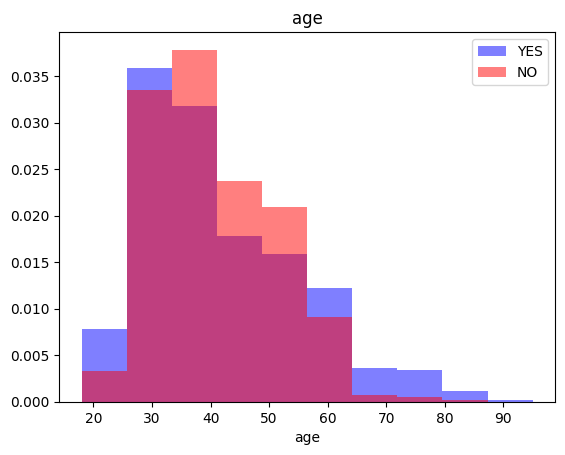

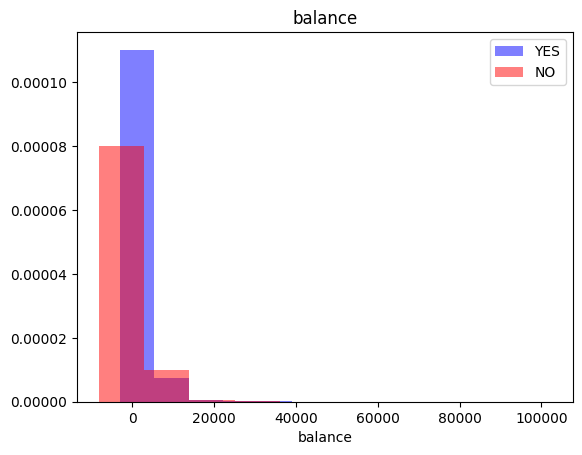

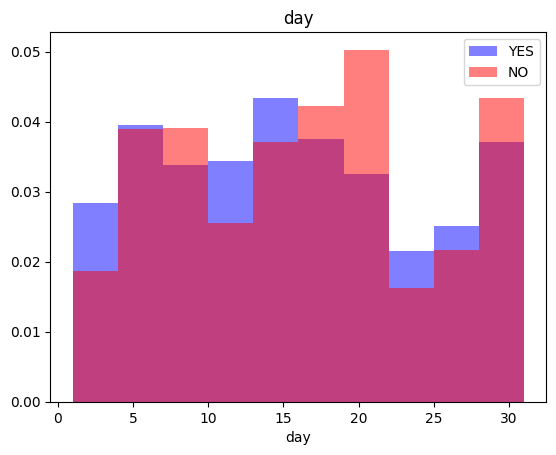

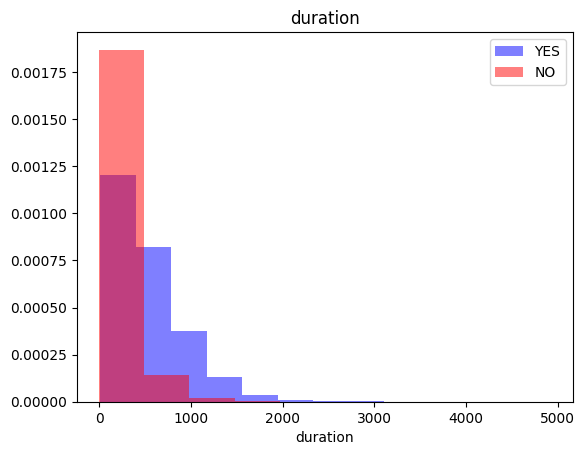

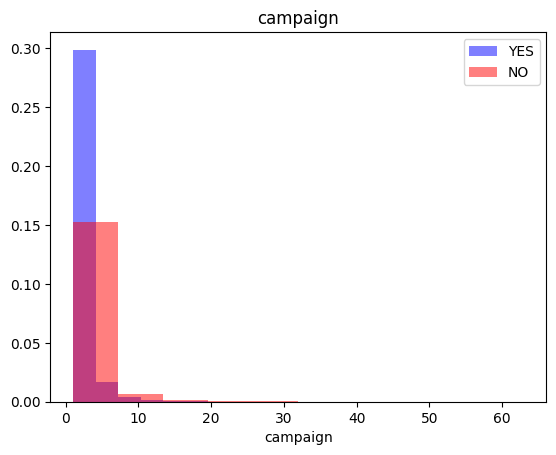

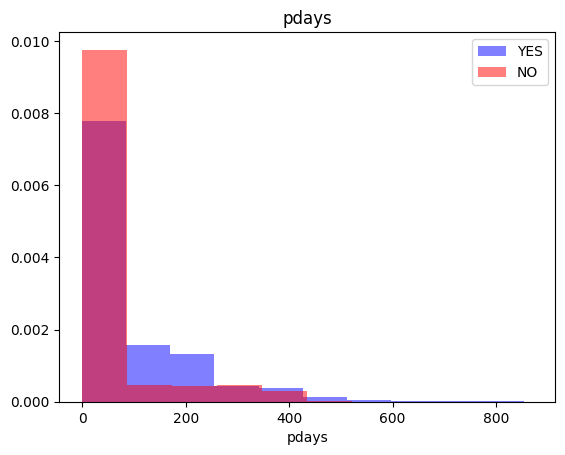

In [10]:
# Histogram of numeric features

# cols = df.columns.tolist()   # name of columns
cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

for label in cols[:-1]:
  plt.hist(df[df['y']=='yes'][label], label='YES', color='blue', alpha=0.5, density=True)
  plt.hist(df[df['y']=='no'][label], label='NO', color='red', alpha=0.5, density=True)
  plt.title(label)
  plt.xlabel(label)
  plt.legend()
  plt.show()

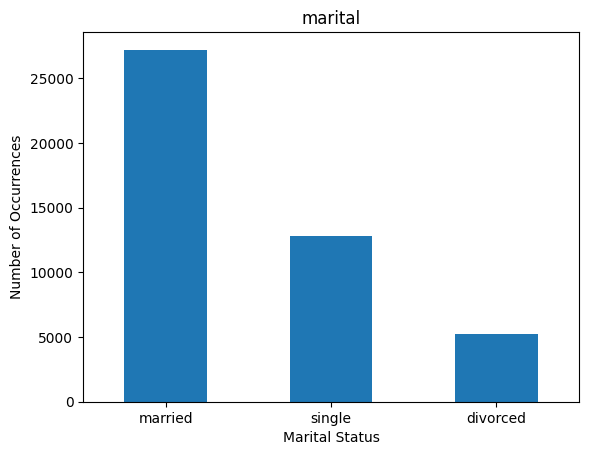

In [17]:
# bar-plot of marital status

marital_status_counts = df['marital'].value_counts()

# Plot the bar chart
marital_status_counts.plot(kind='bar')

plt.xlabel('Marital Status')  # Set the x-axis label
plt.ylabel('Number of Occurrences')  # Set the y-axis label
plt.title('marital')  # Set the title

plt.xticks(rotation=0)  # Rotate x-axis labels for better visibility

plt.show()  # Show the plot

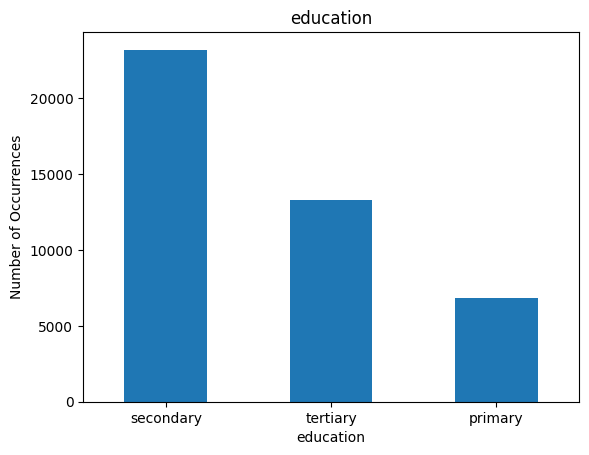

In [24]:
# bar-plot of education

education_counts = df['education'].value_counts()

# Plot the bar chart
education_counts.plot(kind='bar')

plt.xlabel('education')  # Set the x-axis label
plt.ylabel('Number of Occurrences')  # Set the y-axis label
plt.title('education')  # Set the title

plt.xticks(rotation=0)  # Rotate x-axis labels for better visibility

plt.show()  # Show the plot

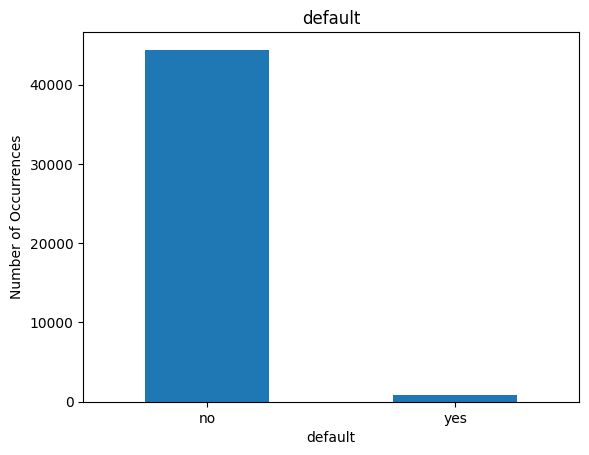

In [23]:
# bar-plot of default

default_counts = df['default'].value_counts()

# Plot the bar chart
default_counts.plot(kind='bar')

plt.xlabel('default')  # Set the x-axis label
plt.ylabel('Number of Occurrences')  # Set the y-axis label
plt.title('default')  # Set the title

plt.xticks(rotation=0)  # Rotate x-axis labels for better visibility

plt.show()  # Show the plot

So the dataset is highly imbalanced in terms of defaulting the loan/credit

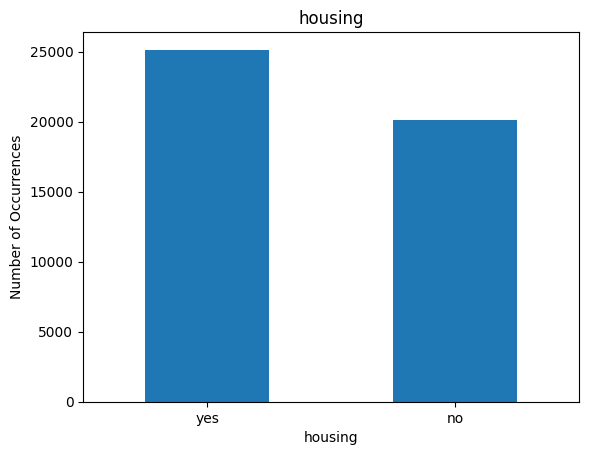

In [22]:
# bar-plot of housing

housing_counts = df['housing'].value_counts()

# Plot the bar chart
housing_counts.plot(kind='bar')

plt.xlabel('housing')  # Set the x-axis label
plt.ylabel('Number of Occurrences')  # Set the y-axis label
plt.title('housing')  # Set the title

plt.xticks(rotation=0)  # Rotate x-axis labels for better visibility

plt.show()  # Show the plot

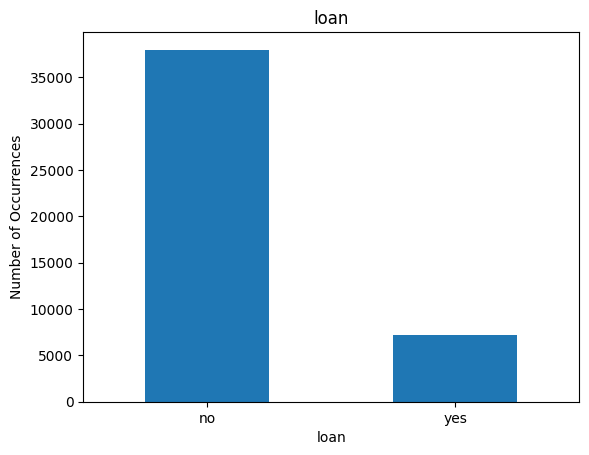

In [21]:
# bar-plot of loan

loan_counts = df['loan'].value_counts()

# Plot the bar chart
loan_counts.plot(kind='bar')

plt.xlabel('loan')  # Set the x-axis label
plt.ylabel('Number of Occurrences')  # Set the y-axis label
plt.title('loan')  # Set the title

plt.xticks(rotation=0)  # Rotate x-axis labels for better visibility

plt.show()  # Show the plot

In [ ]:
# count the number of NaN values in each column

nan_count = df.isna().sum()
nan_count

age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
y                0
dtype: int64

'contact' and 'poutcome' columns contain large number of NaN values. So let's drop these columns

In [ ]:
# drop columns with NaN values

df.drop(['contact', 'poutcome'], axis=1, inplace=True)
df.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,5,may,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,76,1,-1,0,no
3,47,blue-collar,married,NaN,no,1506,yes,no,5,may,92,1,-1,0,no
4,33,NaN,single,NaN,no,1,no,no,5,may,198,1,-1,0,no


Now, let's fill NaN values in 'job' and 'education' columns with the mode of those columns

In [ ]:
# fill NaN values

job_mode = df['job'].mode()[0]   # find the mode of the 'job' column
education_mode = df['education'].mode()[0]

df['job'].fillna(job_mode, inplace=True)
df['education'].fillna(education_mode, inplace=True)

In [ ]:
# count the number of NaN values in each column

nan_count = df.isna().sum()
nan_count

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
y            0
dtype: int64

The rest is more or less the same as before!

In [ ]:
# convert labels to 0 and 1

df['y'] = (df['y'] == 'yes').astype(int)
df.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,-1,0,0
1,44,technician,single,secondary,no,29,yes,no,5,may,151,1,-1,0,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,76,1,-1,0,0
3,47,blue-collar,married,secondary,no,1506,yes,no,5,may,92,1,-1,0,0
4,33,blue-collar,single,secondary,no,1,no,no,5,may,198,1,-1,0,0


In [ ]:
# convert binary values in columns to 0 and 1

df['default'] = (df['default'] == 'yes').astype(int)
df['housing'] = (df['housing'] == 'yes').astype(int)
df['loan'] = (df['loan'] == 'yes').astype(int)
df.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,0,2143,1,0,5,may,261,1,-1,0,0
1,44,technician,single,secondary,0,29,1,0,5,may,151,1,-1,0,0
2,33,entrepreneur,married,secondary,0,2,1,1,5,may,76,1,-1,0,0
3,47,blue-collar,married,secondary,0,1506,1,0,5,may,92,1,-1,0,0
4,33,blue-collar,single,secondary,0,1,0,0,5,may,198,1,-1,0,0


In [ ]:
# convert month to numerical values

month_dict = {'jan': 1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec':12}
df['month'] = df['month'].map(month_dict)

df.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,0,2143,1,0,5,5,261,1,-1,0,0
1,44,technician,single,secondary,0,29,1,0,5,5,151,1,-1,0,0
2,33,entrepreneur,married,secondary,0,2,1,1,5,5,76,1,-1,0,0
3,47,blue-collar,married,secondary,0,1506,1,0,5,5,92,1,-1,0,0
4,33,blue-collar,single,secondary,0,1,0,0,5,5,198,1,-1,0,0


In [ ]:
# convert categorical values to dummy features

one_hot_encoded_marital = pd.get_dummies(df['marital'], prefix='marital')
one_hot_encoded_job = pd.get_dummies(df['job'], prefix='job')
one_hot_encoded_education = pd.get_dummies(df['education'], prefix='education')

df_encoded = pd.concat([df, one_hot_encoded_marital, one_hot_encoded_job, one_hot_encoded_education], axis=1)

# drop categorical columns
df_encoded.drop(['marital', 'job', 'education'], axis=1, inplace=True)

df_encoded.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,education_primary,education_secondary,education_tertiary
0,58,0,2143,1,0,5,5,261,1,-1,...,1,0,0,0,0,0,0,0,0,1
1,44,0,29,1,0,5,5,151,1,-1,...,0,0,0,0,0,1,0,0,1,0
2,33,0,2,1,1,5,5,76,1,-1,...,0,0,0,0,0,0,0,0,1,0
3,47,0,1506,1,0,5,5,92,1,-1,...,0,0,0,0,0,0,0,0,1,0
4,33,0,1,0,0,5,5,198,1,-1,...,0,0,0,0,0,0,0,0,1,0


# Train set, Test set

In [ ]:
from sklearn.model_selection import train_test_split

shuffled_df = df_encoded.sample(frac=1)   # shuffle the dataframe

X = shuffled_df.drop(['y'], axis=1)
y = shuffled_df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(len(y_train))
print(sum(y_train == 1))
print(sum(y_train == 0))

36168
4194
31974


# Feature Scalling, Over Sampling

In [ ]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

# scaling
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

# oversampling
ros = RandomOverSampler()
X_train, y_train = ros.fit_resample(X_train, y_train)

In [ ]:
print(len(y_train))
print(sum(y_train == 1))
print(sum(y_train == 0))

63948
31974
31974


# Training

## Random Forest

In [ ]:
from sklearn.metrics import classification_report

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      7948
           1       0.61      0.51      0.55      1095

    accuracy                           0.90      9043
   macro avg       0.77      0.73      0.75      9043
weighted avg       0.89      0.90      0.90      9043



## XG Boost

In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(max_depth=5)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92      7948
           1       0.46      0.82      0.59      1095

    accuracy                           0.86      9043
   macro avg       0.71      0.84      0.75      9043
weighted avg       0.91      0.86      0.88      9043



## SVM

In [ ]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)
# print(y_pred)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.81      0.88      7948
           1       0.37      0.81      0.51      1095

    accuracy                           0.81      9043
   macro avg       0.67      0.81      0.69      9043
weighted avg       0.90      0.81      0.84      9043



## Neural Net

In [ ]:
import tensorflow as tf

nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
                 loss='binary_crossentropy',
                 metrics=['accuracy'])


history = nn_model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    verbose=0
)

In [ ]:
y_pred = nn_model.predict(X_test) # returns probability
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

print(classification_report(y_test, y_pred))

283/283 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      7948
           1       0.46      0.66      0.54      1095

    accuracy                           0.87      9043
   macro avg       0.71      0.78      0.73      9043
weighted avg       0.89      0.87      0.88      9043

